Linear regression and logistic regression are the two most widely used statistical models, and I consider them as my go-to tools for unlocking the secrets hidden in datasets. In this course, I will build on the skills I gained in "Introduction to Regression in Python with statsmodels," as I learn about linear and logistic regression with multiple explanatory variables. I will explore the relationships between variables in real-world datasets, such as Taiwan house prices and customer churn modeling, among others. By the end of this course, I will know how to include multiple explanatory variables in my models, discover how interactions between variables affect my predictions, and understand how linear and logistic regression work.

## **Parallel Slopes**

#### Fitting a parallel slopes linear regression

In "Introduction to Regression with statsmodels in Python," I learned how to fit linear regression models with a single explanatory variable. However, I understand that relying solely on one explanatory variable may limit the accuracy of predictions. To truly master linear regression, I need to be able to fit regression models with multiple explanatory variables.

In this case, I will explore the scenario where there is one numeric explanatory variable and one categorical explanatory variable. This type of regression is often referred to as a "parallel slopes" linear regression, named after the shape of the predictions it produces. I will delve deeper into this concept in the next exercise.

Now, I will revisit the Taiwan real estate dataset and recall the meaning of each variable.

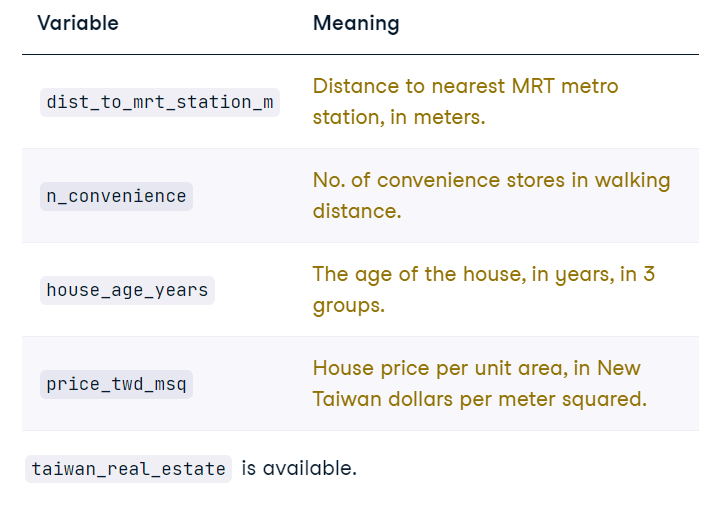

In [2]:
# import the data and necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
# dataset
taiwan_real_estate = pd.read_csv("/content/taiwan_real_estate2.csv")

In [2]:
# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [3]:
# Fit a linear regression of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [4]:
# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols("price_twd_msq ~ n_convenience + house_age_years + 0", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


NOTE: *The model has one slope coefficient, and three intercept coefficients (one for each possible value of the categorical explanatory variable)*

#### Interpreting parallel slopes coefficients:

For linear regression with a single numeric explanatory variable, there is an intercept coefficient and a slope coefficient. For linear regression with a single categorical explanatory variable, there is an intercept coefficient for each category.

- In the "parallel slopes" case, where you have a numeric and a categorical explanatory variable, what do the coefficients mean?

For each adittional nearby convenience store, the expected price, in TWD per square meter increases by 0.791.

- What is the meaning of the "0 to 15 years" coefficient?

For a house age 0-15 with zero nearby convenience stores, the expected price in TWD for square meter is 9.41

#### Visualizing each explanatory variable:

Being able to see the predictions made by a model makes it easier to understand. In the case where there is only one explanatory variable, seaborn lets me do this without any manual calculation.

To visualize the relationship between a numeric explanatory variable and the numeric response, you can draw a scatter plot with a linear trend line.

To visualize the relationship between a categorical explanatory variable and the numeric response, you can draw a box plot.

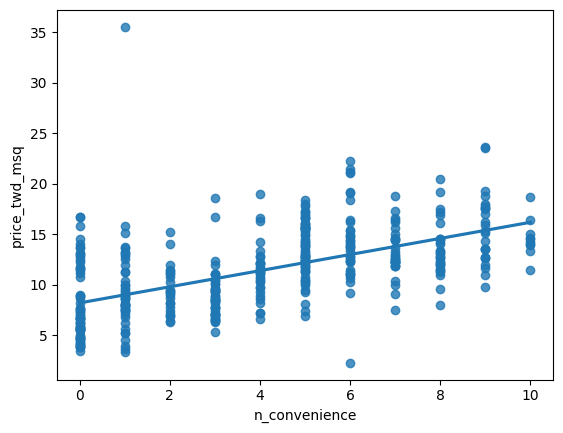

In [5]:
# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Show the plot
plt.show()

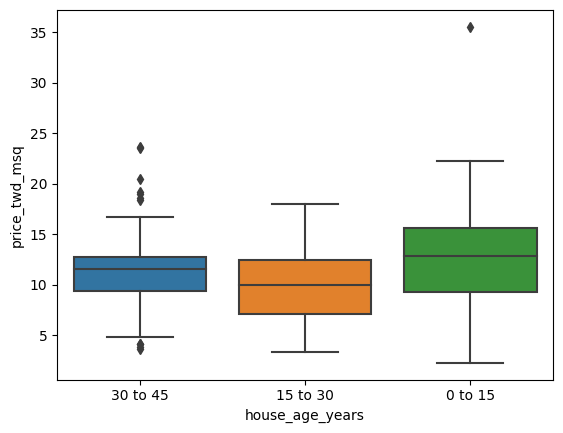

In [6]:
# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(x="house_age_years", y="price_twd_msq", data=taiwan_real_estate)

# Show the plot
plt.show()

NOTE: *With a single numeric explanatory variable, the predictions form a single straight line. With a single categorical explanatory variable, the predictions are the means of each category.*

#### Visualizing parallel slopes:

The two plots in the previous exercise gave very different predictions: one gave a predicted response that increased linearly with a numeric variable; the other gave a fixed response for each category. The only sensible way to reconcile these two conflicting predictions is to incorporate both explanatory variables in the model at once.

When it comes to a linear regression model with a numeric and a categorical explanatory variable, seaborn doesn't have an easy, "out of the box" way to show the predictions.

In [7]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


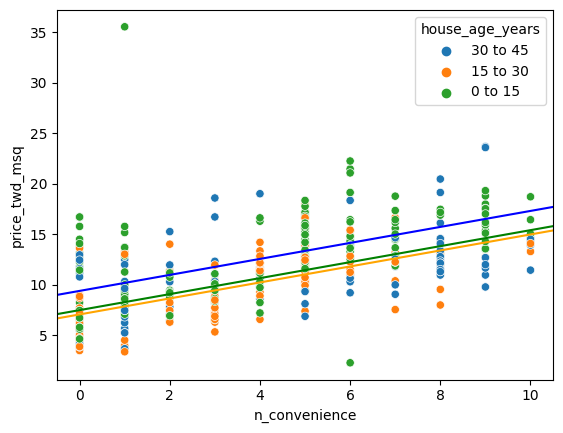

In [8]:
# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

NOTE: *The "parallel slope" model name comes from the fact that the prediction for each category is a slope, and all those slopes are parallel. The plot allows us to see that newer houses are on average more expensive than houses older than 15 years.*

#### Predicting parallel slopes:

1. Predicting parallel slopes:


Predicting responses is perhaps the most useful feature of regression models. With two explanatory variables, the code for prediction has one subtle difference from the case with a single explanatory variable.

2. The prediction workflow:

The prediction workflow starts with choosing values for explanatory variables. You pick any values you want, and store them in a pandas DataFrame. For a single explanatory variable, the DataFrame has one column. An example would be, a range of lengths from 5cm to 60cm, in steps of 5cm. You can reuse the np dot arange function we saw in the previously specify this.

3. The prediction workflow:

For multiple explanatory variables, you need to define multiple columns in your explanatory DataFrame. Say for example, that you would like to create a DataFrame that holds all combinations of A, B, and C, and the numbers 1 and 2. You could manually create such a DataFrame, but this would be cumbersome and not scalable for more than two explanatory variables. A useful trick to create such a DataFrame is to use the product function from the itertools module. The product function returns a Cartesian product of your input variables. In other words, it outputs all combinations of its inputs. Let's think of how we can apply this to our taiwan_real_estate dataset. You first create your explanatory variable lists. For a categorical variable, we use pandas' unique method. This method extracts the unique values of your categorical variable. The product function then creates a combination of all of the elements of these input lists. Lastly, you transform the output of the product function into a pandas DataFrame, and name the columns.

4. The prediction workflow:

Next you add a column of predictions to the DataFrame. To calculate the predictions, start with the explanatory DataFrame, call assign, name the response variable and use the predict method on the model, passing explanatory data as the arguments.

5. Visualizing the predictions:

We can visualize the predictions from the model by adding another scatter plot and setting the data argument to prediction_data. I also set the color argument to black to distinguish between predictions and actual data points. Notice how the black prediction points lie on the trend lines.

6. Manually calculating predictions for linear regression:

In the previous course, you saw how to manually calculate the predictions for linear regression. The params attribute contains the coefficients from the model. The intercept is the first coefficient, and the slope is the second coefficient. Then the response value is the intercept plus the slope times the explanatory variable.

7. Manually calculating predictions for multiple regression:

For the parallel slopes model, we already saw that each category of the categorical variable has a different intercept. This means that, to calculate predictions, you would have to choose the intercept using if-else statements. This becomes clunky when you have lots of categories.

8. np.select():

NumPy has a function called select that simplifies the process of getting values based on conditions. np dot select takes two arguments: a list of conditions, and a list of choices. Both lists have to be of the same length. You can read it as: 'If condition 1 is met, take the first element in choices, if condition 2 is met, take the second element in choices', and so on. The output is an array drawn from the elements in choices, depending on conditions. This is very abstract, so let's look at how we use it for predictions.

9. Choosing an intercept with np.select():

The conditions list contains a condition statement for each species. It returns a True of False whether the species is Bream, Perch, Pike, or Roach. The choices list is the collection of intercepts that were extracted from the model coefficients. Recall that both lists have to contain the same number of elements. np dot select will then retrieve the corresponding intercept for each of the fish species. Since our explanatory dataset contained 48 rows of data (12 for each fish species), the output will contain 48 intercepts as well. Notice the recurring pattern in the intercepts, corresponding to the repeating fish species.

10. The final prediction step:

The final step is to calculate the response. As before, the response is the intercept plus the slope times the numeric explanatory variable. This time, the intercept is different for different rows. The model predicts some negative masses, which isn't a good sign. Let's check that we got the right answer by calling predict.

11. Compare to .predict():

You can see that the predictions are the same numbers as the mass column that we calculated, so our calculations are correct. It's just that this model performs poorly for small fish lengths.

#### **Predicting with a parallel slopes model using code**

In [9]:
from itertools import product
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])


# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_both.predict(explanatory_data))

print(prediction_data.head(3))

   n_convenience house_age_years  price_twd_msq
0              0        30 to 45       7.510958
1              0        15 to 30       7.085169
2              0         0 to 15       9.413325


NOTE: *By adding combinations of explanatory variables, you increase the number of predictions as well. Let's visualize these predictions in the next exercise.*

#### **Visualizing parallel slopes model predictions**

In [10]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope  = coeffs

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


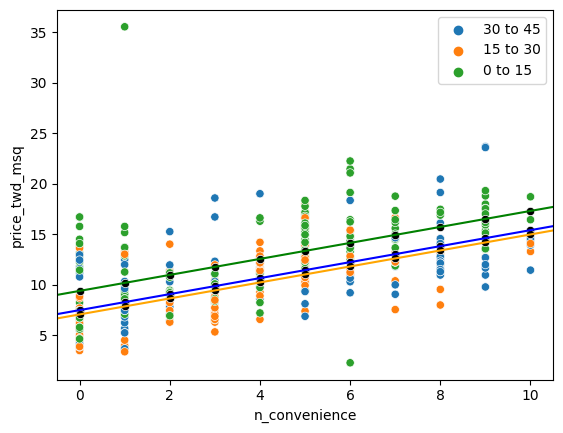

In [11]:
# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                color="black",
                data=prediction_data)

plt.show()

*The predictions lie exactly on the trend lines. Now it is up to us to calculate these predictions manually.*

#### **Manually calculating predictions**

As with simple linear regression, you can also manually calculate the predictions from the model coefficients. The only change for the parallel slopes case is that the intercept is different for each category of the categorical explanatory variable. That means we need to consider the case when each category occurs separately.

In [12]:
# Define conditions
conditions = [
	explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
	explanatory_data["house_age_years"] == "30 to 45"]

# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]

# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    intercept = intercept,
  	price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

print(prediction_data.head(3))

   n_convenience house_age_years  intercept  price_twd_msq
0              0        30 to 45   7.510958       7.510958
1              0        15 to 30   7.085169       7.085169
2              0         0 to 15   9.413325       9.413325


NOTE: *Even for more complicated linear regression models, the prediction just involves adding and multiplying coefficients for different conditions of explanatory variables.*

#### Assessing model performance:

We saw two metrics for measuring model performance the coefficient of determination, and the residual standard error. The coefficient of determination, sometimes known as the R-squared value, measures how good the regression's prediction line fits the observed values, and a larger number is better. The residual standard error, sometimes abbreviated as RSE, is - loosely speaking - the typical size of the residuals. Let's see if these metrics improve when both explanatory variables are included in the fish model.

To easily get the coefficient of determination, you can use the rsquared attribute of the fitted model. where zero is the worst possible fit and one is a perfect fit.

Adding more explanatory variables often increases the coefficient of determination for a model, but there is a problem. Including too many explanatory variables in your model can lead to a phenomenon called overfitting. That's when your model is optimized to provide the best fit for that particular dataset, but no longer reflects the general population.

A variant metric called adjusted coefficient of determination includes a small penalty term for each additional explanatory variable to compensate for this effect. Its a better metric than the plain coefficient of determination. To get this metric, we use the rsquared_adj attribute.

The code to get the residual standard error is the same as before. RSE isn't directly available as an attribute, but the MSE is. Recall that the MSE is the mean squared error. Consequently, you take the square root of the mse_resid attribute to get the RSE.

**Comparing coefficients of determination**:

Recall that the coefficient of determination is a measure of how well the linear regression line fits the observed values. An important motivation for including several explanatory variables in a linear regression is that you can improve the fit compared to considering only a single explanatory variable.

Here we'll compare the coefficient of determination for the three Taiwan house price models, to see which gives the best result.

In [13]:
# Print the coeffs of determination for mdl_price_vs_conv
print("rsquared_conv: ", mdl_price_vs_conv.rsquared)
print("rsquared_adj_conv: ", mdl_price_vs_conv.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_age
print("rsquared_age: ", mdl_price_vs_age.rsquared)
print("rsquared_adj_age: ", mdl_price_vs_age.rsquared_adj)

# BETTER FIT
# Print the coeffs of determination for mdl_price_vs_both
print("rsquared_both: ", mdl_price_vs_both.rsquared)
print("rsquared_adj_both: ", mdl_price_vs_both.rsquared_adj)

rsquared_conv:  0.32604660851305023
rsquared_adj_conv:  0.32441079931041195
rsquared_age:  0.08382749316665172
rsquared_adj_age:  0.07936923279276686
rsquared_both:  0.39517387968887374
rsquared_adj_both:  0.3907483227109875


NOTE: *When both explanatory variables are included in the model, the adjusted coefficient of determination is higher, resulting in a better fit.*

**Comparing residual standard error:**

The other common metric for assessing model fit is the residual standard error (RSE), which measures the typical size of the residuals.

RSE can't directly be retrieved using statsmodels, but we can retrieve the mean squared error (MSE) using the .mse_resid attribute. By taking the square root of the MSE, we can obtain the RSE.

In [14]:
# Print the RSE for mdl_price_vs_conv
print("rse_conv: ", np.sqrt(mdl_price_vs_conv.mse_resid))

# Print the RSE for mdl_price_vs_age
print("rse_age: ", np.sqrt(mdl_price_vs_age.mse_resid))

# LOWEST RSE
# Print RSE for mdl_price_vs_both
print("rse_both: ", np.sqrt(mdl_price_vs_both.mse_resid))

rse_conv:  3.383887521343047
rse_age:  3.950183875630859
rse_both:  3.213460280552323


NOTE: *By including both explanatory variables in the model, a lower RSE was achieved, indicating a smaller difference between the predicted responses and the actual responses.*

## Interactions

We will explore the effect of interactions between explanatory variables. Considering interactions allows for more realistic models that can have better predictive power. You'll also deal with Simpson's Paradox: a non-intuitive result that arises when you have multiple explanatory variables.

The parallel slopes model enforced a common slope for each category. That's not always the best option, One way to give each species a different slope is to run a separate model for each category.

1. First, we split up the taiwan_real_estate dataset into four subsets. Let's filter for each house_age_years, one at a time and assign the result to individual variables.

2. we can run three models, all predicting price based on number of convenience store for each house_age_years. Observe that each model gives a different intercept and a different slope.

3. To make predictions with these models, we first have to create a DataFrame of explanatory variables. The good news is that since each model has the same explanatory variable, you only have to write this code once.

4. Predicting follows the now familiar flow. Add a column with the assign method, name it after the response variable, call predict on the model and add explanatory_data as the argument. The only difference in each case is the model variable, since every house_age_years has its own model coefficients now. It isn't necessary for calculating the predictions, but to make the plotting code easier, I've also included the house_age_years in each prediction dataset.

5. Working with all these separate prediction DataFrames for each house_age_years isn't very convenient. Therefore, we combine all three DataFrames in one prediction DataFrame, using the concat function. This basically sticks a list of separate DataFrames back together into one.

6. To visualize regression models across subsets of a dataset, we can't use the regplot function anymore. Instead, we use seaborn's lmplot function. It takes the usual x, y, and data arguments, and a hue argument to define which variable the data should be subsetted on. Unlike the parallel slopes case, each line has its own slope,

7. To sanity check our concatenated predictions, we add them to the plot to see if they align with what seaborn's lmplot calculated.

8. We then compare the overall model with the separate models to see if the coefficient of determination and RSE are improved or not.

**One model per category:**

The model we ran on the whole dataset fits some parts of the data better than others. It's worth taking a look at what happens when we run a linear model on different parts of the dataset separately, to see if each model agrees or disagrees with the others.

In [15]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "0 to 15"]

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "15 to 30"]

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "30 to 45"]

In [16]:
# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "15 to 30"]

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "30 to 45"]

# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 = ols("price_twd_msq ~ n_convenience", data=taiwan_0_to_15).fit()

# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 = ols("price_twd_msq ~ n_convenience", data=taiwan_15_to_30).fit()

# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 = ols("price_twd_msq ~ n_convenience", data=taiwan_30_to_45).fit()

# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

Intercept        9.241702
n_convenience    0.833587
dtype: float64
Intercept        6.871919
n_convenience    0.851917
dtype: float64
Intercept        8.113123
n_convenience    0.668698
dtype: float64


NOTE: *You now have three models giving three different answers. Let's visualize the differences, then figure out how to reconcile the differences.*

**Predicting multiple models:**

In order to see what each category's model is doing, it's helpful to make predictions from them. The flow is exactly the same as the flow for making predictions on the whole model, though we should remember that we only have a single explanatory variable in these models.

The models mdl_0_to_15, mdl_15_to_30 and mdl_30_to_45 are available.

In [17]:
# Create explanatory_data, setting no. of conv stores from  0 to 10
explanatory_data = pd.DataFrame({"n_convenience":np.arange(0, 11)})

# Add column of predictions using "0 to 15" model and explanatory data
prediction_data_0_to_15 = explanatory_data.assign(price_twd_msq=mdl_0_to_15.predict(explanatory_data))

# Same again, with "15 to 30"
prediction_data_15_to_30 = explanatory_data.assign(price_twd_msq=mdl_15_to_30.predict(explanatory_data))

# Same again, with "30 to 45"
prediction_data_30_to_45 = explanatory_data.assign(price_twd_msq=mdl_30_to_45.predict(explanatory_data))

print(prediction_data_0_to_15)
print(prediction_data_15_to_30)
print(prediction_data_30_to_45)

    n_convenience  price_twd_msq
0               0       9.241702
1               1      10.075289
2               2      10.908876
3               3      11.742462
4               4      12.576049
5               5      13.409636
6               6      14.243222
7               7      15.076809
8               8      15.910396
9               9      16.743982
10             10      17.577569
    n_convenience  price_twd_msq
0               0       6.871919
1               1       7.723836
2               2       8.575753
3               3       9.427670
4               4      10.279588
5               5      11.131505
6               6      11.983422
7               7      12.835339
8               8      13.687257
9               9      14.539174
10             10      15.391091
    n_convenience  price_twd_msq
0               0       8.113123
1               1       8.781822
2               2       9.450520
3               3      10.119218
4               4      10.787916
5         

*Now that you have predictions for each model, let's see how they compare.*

**Visualizing multiple models**:

Previously, we ran models for each category of house ages separately, then calculated predictions for each model. Now it's time to visualize those predictions to see how they compare.

When you use sns.lmplot() with the hue argument set to the categorical variable, you get multiple trend lines, each with their own slope. This is in contrast with the parallel slopes model we saw earlier, where all models had the same slope.

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


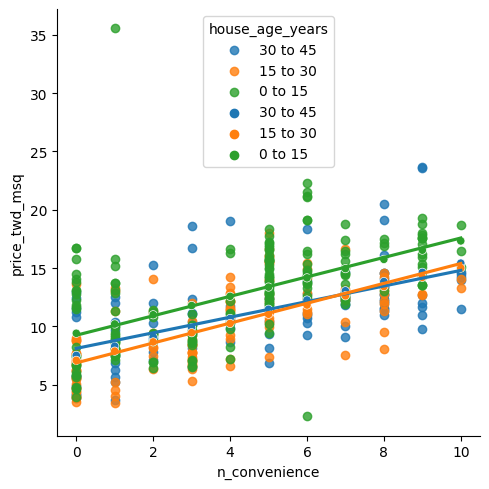

In [18]:
# Plot the trend lines of price_twd_msq vs. n_convenience for each house age category
sns.lmplot(x="n_convenience",
           y="price_twd_msq",
           data=taiwan_real_estate,
           hue="house_age_years",
           ci=None,
           legend_out=False)

# Add a scatter plot for prediction_data
sns.scatterplot(x="n_convenience",
           y="price_twd_msq",
           data=prediction_data,
           hue="house_age_years")
plt.show()

NOTE: *It's a good sign that our predictions match those of lmplot's. Notice that the 30 to 45 year house age group has a much shallower slope compared to the other lines.*

**Assessing model performance**:

To test which approach is best — the whole dataset model or the models for each house age category — we need to calculate some metrics. Here, we'll compare the coefficient of determination and the residual standard error for each model.

In [19]:
mdl_all_ages = ols("price_twd_msq ~ house_age_years + n_convenience + 0", data=taiwan_real_estate).fit()

In [20]:
# Print the coeff. of determination for mdl_all_ages
print("R-squared for mdl_all_ages: ", mdl_all_ages.rsquared)

# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)

R-squared for mdl_all_ages:  0.39517387968887374
R-squared for mdl_0_to_15:  0.3120536339435178
R-squared for mdl_15_to_30:  0.4424604869682426
R-squared for mdl_30_to_45:  0.3125713334387281


In [21]:
# Print the RSE for mdl_all_ages
print("RSE for mdl_all_ages: ", np.sqrt(mdl_all_ages.mse_resid))

# Print the RSE for mdl_0_to_15
print("RSE for mdl_0_to_15: ", np.sqrt(mdl_0_to_15.mse_resid))

# Print the RSE for mdl_15_to_30)
print("RSE for mdl_15_to_30: ", np.sqrt(mdl_15_to_30.mse_resid))

# Print the RSE for mdl_30_to_45
print("RSE for mdl_30_to_45: ", np.sqrt(mdl_30_to_45.mse_resid))


RSE for mdl_all_ages:  3.213460280552323
RSE for mdl_0_to_15:  3.564126993631971
RSE for mdl_15_to_30:  2.5852728709073385
RSE for mdl_30_to_45:  3.239037479434981


NOTE: *It seems that both metrics for the 15 to 30 age group model are much better than those for the whole dataset model, but the models for the other two age groups are similar to the whole dataset model. Thus, using individual models will improve predictions for 15 to 30 age group.*

#### One model with an interaction:

Messing about with different models for different bits of your dataset is a pain. A better solution is to specify a single model that contains intercepts and slopes for each category. This is achieved through specifying interactions between explanatory variables.

To understand the idea of interactions between explanatory variables, consider what we know about the taiwan_real_estate dataset. Different house_age_years category has different price to n_convenience ratios. In statistical terms, we can say that the effect that n_convenience has on the expected price of a house varies between house_age_years. That means that n_convenience and house_age_years interact. More generally, if the effect of one explanatory variable on the expected response has different values dependent on the values of another explanatory variable, then those two explanatory variables interact.

You've seen how to include multiple explanatory variables in a formula using plus, for example, n_convenince plus house_age_hours. To include an interaction between those variables, you simply swap the plus for a times. I've called this syntax implicit because you didn't write down what interactions are needed - statsmodels figures that out itself. Usually this concise syntax is best, but occasionally you may wish to explicitly document which interactions are included in the model. The explicit syntax is to add each explanatory variable separated by plus then add a third term with both explanatory variables separated by a colon. The result is exactly the same, so choosing a syntax depends on personal preference.

In fact, the model with the interaction is effectively the same as fitting separate models for each category, only you get the convenience of not having to manage four sets of code.

Specifying an interaction:

So far you've used a single parallel slopes model, which gave an OK fit for the whole dataset, then three separate models for each house age category, which gave a better fit for each individual category, but was clunky because you had three separate models to work with and explain. Ideally, you'd have a single model that had all the predictive power of the individual models.

Defining this single model is achieved through adding interactions between explanatory variables. The syntax of statsmodels.formula is flexible, and gives you a couple of options, depending on whether you prefer concise code that is quick to type and to read, or explicit code that describes what you are doing in detail.

In [22]:
# Model price vs both with an interaction using "times" syntax
mdl_price_vs_both_inter = ols("price_twd_msq ~ n_convenience * house_age_years", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


In [23]:
# Model price vs. both with an interaction using "colon" syntax
mdl_price_vs_both_inter = ols("price_twd_msq ~ n_convenience +  house_age_years + n_convenience:house_age_years", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


*Notice that the model coefficients are the same in each case. The formula syntax is very flexible, giving you a choice between 'easy to type' and 'very explicit', depending on your preference.*

**Interactions with understandable coeffs**:

The previous model with the interaction term returned coefficients that were a little tricky to interpret. In order clarify what the model is predicting, we can reformulate the model in a way that returns understandable coefficients. For further clarity, we can compare the results to the models on the separate house age categories (mdl_0_to_15, mdl_15_to_30, and mdl_30_to_45).

In [24]:
# Model price vs. house age plus an interaction, no intercept
mdl_readable_inter = ols("price_twd_msq ~ house_age_years + n_convenience:house_age_years + 0", data=taiwan_real_estate).fit()

# Print the coefficients for mdl_0_to_15
print("mdl_0_to_15 coefficients:", "\n", mdl_0_to_15.params)

# Print the coefficients for mdl_15_to_30
print("mdl_15_to_30 coefficients:", "\n", mdl_15_to_30.params)

# Print the coefficients for mdl_30_to_45
print("mdl_30_to_45 coefficients:", "\n", mdl_30_to_45.params)

# Print the coefficients for mdl_readable_inter
print("\n", "mdl_readable_inter coefficients:", "\n", mdl_readable_inter.params)

mdl_0_to_15 coefficients: 
 Intercept        9.241702
n_convenience    0.833587
dtype: float64
mdl_15_to_30 coefficients: 
 Intercept        6.871919
n_convenience    0.851917
dtype: float64
mdl_30_to_45 coefficients: 
 Intercept        8.113123
n_convenience    0.668698
dtype: float64

 mdl_readable_inter coefficients: 
 house_age_years[0 to 15]                   9.241702
house_age_years[15 to 30]                  6.871919
house_age_years[30 to 45]                  8.113123
n_convenience:house_age_years[0 to 15]     0.833587
n_convenience:house_age_years[15 to 30]    0.851917
n_convenience:house_age_years[30 to 45]    0.668698
dtype: float64


NOTE:
- *The expected increase in house price for each nearby conveneince store is the lowest for the 30 to 45 year age group*
- *Sometimes fiddling about with how the model formula is specified makes it easier to interpret the coefficients. In this version, you can see how each category has its own intercept and slope (just like the 3 separate models had).*

#### Making predictions with interactions

the prediction flow is exactly the same as the code in the parallel slopes model. The important thing to remember here is the use of product from itertools to get all the combinations of lengths and species. Then you convert this to a DataFrame, naming the columns accordingly. statsmodels will automatically take care of the interaction when creating prediction data, so you don't need to change anything.

The plot is identical to the one we saw in the earlier. This time however, the code is simpler because we don't have four separate models to worry about.

To see how the predictions work, let's manually calculate them. First we get the coefficients from the model using the params attribute. Then we unpack all the coefficients into the four intercepts and the four slopes.

Recall numpy's select function, which takes a list of conditions and an equal-sized list of choices as arguments. In the case of the intercept choices, np dot select will retrieve the corresponding intercept for each of the fish species. You can read it as: 'if the species is Bream, pick the Bream intercept from the choice list. If the species is Perch, pick the Perch intercept, and so on.' Since we now have one slope for each of the species as well, we also apply the same np dot select function on the slope choices, each time picking the right slope from the choice list.

Finally, to calculate the predictions themselves, use the formula intercept plus slope times explanatory data. Thanks to np dot select, the appropriate intercept and slope will be used for each fish species. The calculated values are the same as those returned by the predict function.

Predicting with interactions:

As with every other regression model you've created, the fun part is making predictions. Fortunately, the code flow for this case is the same as the one without interactions — statsmodels can handle calculating the interactions without any extra prompting from you. The only thing you need to remember is the trick for getting combinations of explanatory variables.

In [26]:
  # Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])

# Print it
print(explanatory_data.head(5))

   n_convenience house_age_years
0              0        30 to 45
1              0        15 to 30
2              0         0 to 15
3              1        30 to 45
4              1        15 to 30


In [27]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_both_inter.predict(explanatory_data))

# Print prediction_data
print(prediction_data.head())

   n_convenience house_age_years  price_twd_msq
0              0        30 to 45       8.113123
1              0        15 to 30       6.871919
2              0         0 to 15       9.241702
3              1        30 to 45       8.781822
4              1        15 to 30       7.723836


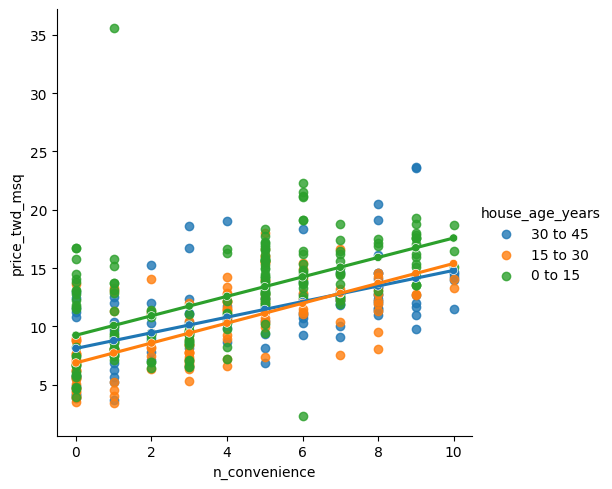

In [30]:
# Plot the trend lines of price_twd_msq vs. n_convenience colored by house_age_years
sns.lmplot(x="n_convenience",
           y="price_twd_msq",
           data=taiwan_real_estate,
           hue="house_age_years",
           ci=None)

# Add a scatter plot for prediction_data
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=prediction_data,
                hue="house_age_years",
                legend=False)

# Show the plot
plt.show()

NOTE: *The code flow here is identical to the parallel slopes case we saw earlier*

**Manually calculating predictions with interactions**:

In order to understand how .predict() works, it's time to calculate the predictions manually again. For this model, there are three separate lines to calculate for, and in each one, the prediction is an intercept plus a slope times the numeric explanatory value. The tricky part is getting the right intercept and the right slope for each case.

In [31]:
# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

In [32]:
# Create conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"
]

# Create intercept_choices
intercept_choices = [ic_0_15, ic_15_30, ic_30_45]

# Create slope_choices
slope_choices = [slope_0_15, slope_15_30, slope_30_45]

In [34]:
# Create intercept and slope
intercept = np.select(conditions, intercept_choices)
slope = np.select(conditions, slope_choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    price_twd_msq= intercept + slope * explanatory_data["n_convenience"])

# Print it
print(prediction_data.head())

   n_convenience house_age_years  price_twd_msq
0              0        30 to 45      -1.128579
1              0        15 to 30      -2.369784
2              0         0 to 15       9.241702
3              1        30 to 45      -1.293467
4              1        15 to 30      -2.351453


NOTE: *Essentially, prediction just involves adding and multiplying the correct coefficients and explanatory values.*

#### Simpson's Paradox

The Sampson paradox refers to a situation where the interpretation of a statistical model changes drastically based on the inclusion or exclusion of certain data points. In simpler terms, it means that the results of a statistical analysis can appear contradictory or counterintuitive when specific data points are taken into consideration.

To illustrate this paradox, consider a scenario where a statistical model suggests that a certain variable has a positive effect on an outcome. However, when a few influential data points are removed or added, the same statistical model may indicate a negative effect instead.

In essence, the Sampson paradox highlights how the inclusion or exclusion of influential data points can lead to a reversal in the conclusions drawn from a statistical analysis, causing confusion or contradiction.

**Modeling eBay auctions:**

Sometimes modeling a whole dataset suggests trends that disagree with models on separate parts of that dataset. This is known as Simpson's paradox. In the most extreme case, you may see a positive slope on the whole dataset, and negative slopes on every subset of that dataset (or the other way around).

you'll look at eBay auctions of Palm Pilot M515 PDA models.

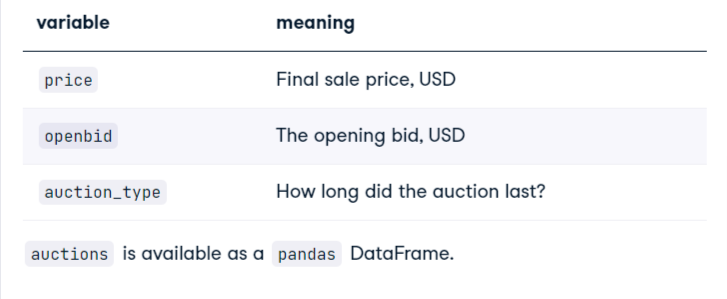



In [35]:
auctions = pd.read_csv("/content/auctions.csv")
auctions.head()

,price,openbid,auction_type
0,260.00,0.01,7 day auction
1,256.86,0.01,3 day auction
2,260.00,0.01,5 day auction
3,238.02,0.01,7 day auction
4,231.50,1.00,7 day auction


In [37]:
# Take a glimpse at the dataset
print(auctions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         343 non-null    float64
 1   openbid       343 non-null    float64
 2   auction_type  343 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.2+ KB
None


In [36]:
# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols("price ~ openbid", data=auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

Intercept    229.245667
openbid       -0.002098
dtype: float64


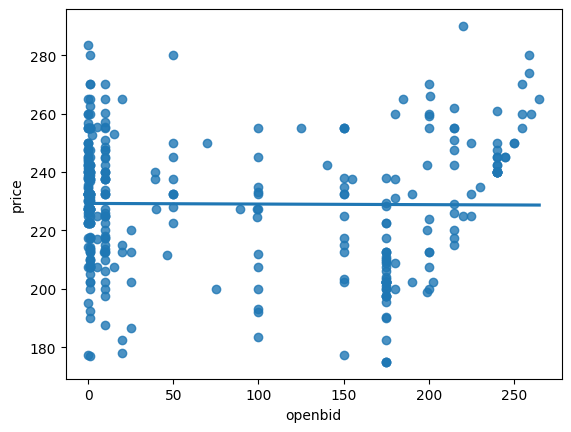

In [38]:
# Plot the scatter plot pf price vs. openbid with a linear trend line
sns.regplot(x="openbid",
            y="price",
            data=auctions,
            ci=None)

# Show the plot
plt.show()

NOTE: *The slope coefficient is small enough that it might as well be zero. That is, opening bid appears to have no effect on the final sale price for Palm Pilots.*

**Modeling each auction type**:

We just saw that the opening bid price appeared not to affect the final sale price of Palm Pilots in the eBay auctions. Now let's look at what happens when we model the three auction types (3 day, 5 day, and 7 day) separately.

In [39]:
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both = ols("price ~ openbid * auction_type + 0", data=auctions).fit()

# See the result
print(mdl_price_vs_both.params)

auction_type[3 day auction]              226.369005
auction_type[5 day auction]              221.599320
auction_type[7 day auction]              231.602861
openbid                                   -0.029026
openbid:auction_type[T.5 day auction]      0.113040
openbid:auction_type[T.7 day auction]      0.032707
dtype: float64


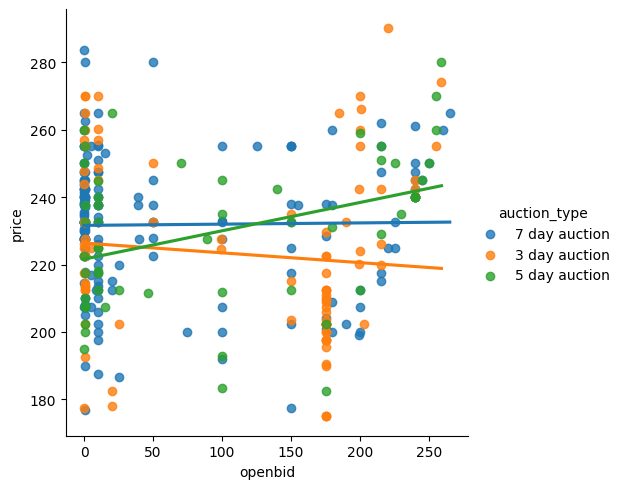

In [40]:
# Using auctions, plot price vs. opening bid colored by auction type as a scatter plot with linear regr'n trend lines
sns.lmplot(x="openbid",
            y="price",
            data=auctions,
            hue="auction_type",
            ci=None)

# Show the plot
plt.show()

NOTE: *Interpreting models is a subtle art, and our conclusions need to be based on the question we are trying to answer. Here, the answer to 'Does opening bid affect final sale price?' is no overall, but the answer to 'Does opening bid price affect final sale price for any type of auction?' is yes, for 5 day auctions.*

## Multiple Linear Regression

We built the models had one numeric and one categorical explanatory variable. Let's see what changes if you have two numeric explanatory variables instead.

1. Visualizing three numeric variables:

Two numeric explanatory variables plus a numeric response variable gives three numeric variables to plot. Since scatter plots are designed to show relationships between two numeric variables, it takes more thinking about. There are two common choices. Either we draw a 3D scatter plot, or a 2D scatter plot, using color for the response variable.

2. 2D scatter plot, color for response:

The next plot type to explore uses color for the response variable. This is a standard 2D scatter plot so we can use seaborn, setting the hue argument to response variable. Interpretation wise, it is an improvement over the 3D scatter plot. As you move up and to the right on the plot, the colors get darker.

3. Modeling with two numeric explanatory variables:

Modeling with an extra explanatory variable isn't much different than what we've seen previously. The explanatory variables on the right of the formula are separated with a plus, as before. You get a global intercept coefficient, and one slope coefficient for each explanatory variable.

4. The prediction flow:

The prediction flow is no different. Create a DataFrame of explanatory values with product from itertools, then add a column of predictions with assign and predict.

5. Plotting the predictions:

The plotting code also remains largely the same. I create two scatter plots: one with the actual data points, and one with the prediction data points. To avoid duplication, the legend in one of the scatter plot calls can be removed. For clarity, I also changed the prediction data point markers to squares with the marker argument. The results look like this. The color grid gives a nice overview of how the response variable changes over the plane of the explanatory variables.

6. Including an interaction:

To include an interaction in the model, the only change is to replace the plus in the formula with a times. This gives you one extra slope term for the effect of the interaction between the two explanatory variables.

7. The prediction flow with an interaction:

The prediction flow is exactly the same as before. Repetitive, but pleasingly easy. The only thing that has changed is the name of the model.

8. Plotting the predictions:

The plotting code is identical, but the colors on the plot are slightly different. In this case, the colors of the square prediction points closely match the colors of the nearby circular data points, which is a nice visual indicator that the model is a good fit.

**Visualizing three numeric variables**:

There are also some "flat" alternatives to 3D plots that provide easier interpretation, though they require a little thinking about to make. A good approach is plotting the two numeric explanatory variables on the x- and y-axis of a scatter plot, and coloring the points according to the response variable.

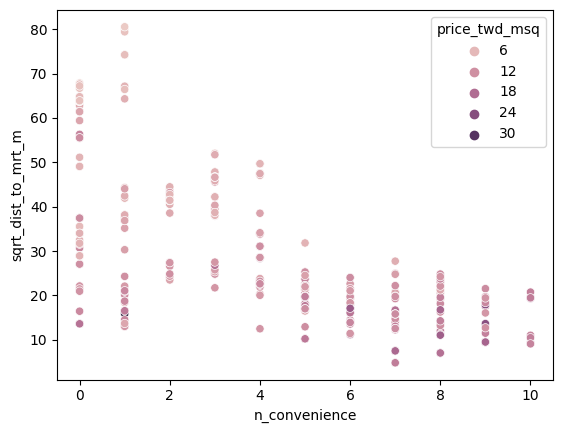

In [41]:
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x="n_convenience",
                y="sqrt_dist_to_mrt_m",
                data=taiwan_real_estate,
                hue="price_twd_msq")

# Show the plot
plt.show()

NOTE: *Using color for the numeric response variable is a great alternative for 3D scatter plots. The plot suggests that prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short. Additionally, there tend to be more convenience stores when the nearest MRT station is close.*

**Modeling two numeric explanatory variables:**

We already saw how to make a model and predictions with a numeric and a categorical explanatory variable. The code for modeling and predicting with two numeric explanatory variables is the same, other than a slight difference in how to specify the explanatory variables to make predictions against.

Here we'll model and predict the house prices against the number of nearby convenience stores and the square-root of the distance to the nearest MRT station.

In [42]:
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_conv_dist.params)

Intercept             15.103790
n_convenience          0.214221
sqrt_dist_to_mrt_m    -0.157300
dtype: float64


In [43]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience, sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m"])

In [45]:
# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data)
)

# See the result
print(prediction_data.head())

   n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0              0                   0      15.103790
1              0                  10      13.530787
2              0                  20      11.957784
3              0                  30      10.384781
4              0                  40       8.811778


NOTE: *The modeling and prediction flow for two numeric variables is just as it was for the previous case that included a categorical variable. statsmodels automatically handles this different scenario. Now let's plot these predictions and see how they match with the actual data points.*

**Visualizing two numeric explanatory variables**:

The code for visualizing two numeric explanatory variables is the same as we've seen before: create a layer of the actual data points, and add a layer of the prediction points to see how they match. In the case of two numeric explanatory variables, the prediction point layer will look like a grid.

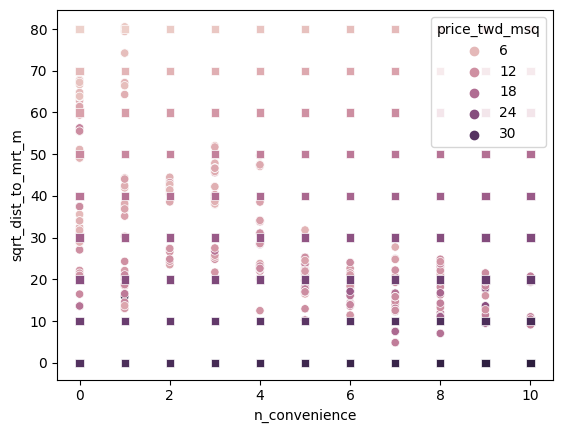

In [46]:
# Create scatter plot of taiwan_real_estate
sns.scatterplot(x="n_convenience",
                y="sqrt_dist_to_mrt_m",
                data=taiwan_real_estate,
                hue="price_twd_msq")

# Create scatter plot of prediction_data without legend
sns.scatterplot(x="n_convenience",
                y="sqrt_dist_to_mrt_m",
                data=prediction_data,
                hue="price_twd_msq",
                legend=False,
                marker="s")

# Show the plot
plt.show()

NOTE: *Plotting a colored grid of predictions can give us a general idea of how your model performs. The prediction grid confirms that our model is a good fit: prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short.*

**Including an interaction:**

Just as in the case with one numeric and one categorical explanatory variable, it is possible for numeric explanatory variables to interact. With this model structure, we'll get a third slope coefficient: one for each explanatory variable and one for the interaction.

In [47]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))


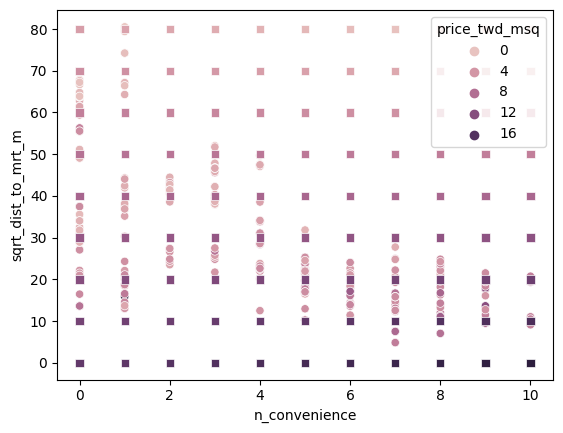

In [48]:
sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

NOTE: *Although the predictions from the model are different now that the interaction is included, the code to create them is the same. The resulting prediction grid is not much different from the model without an interaction.*

#### More than two explanatory variables
**Visualizing many variables**:

As you begin to consider more variables, plotting them all at the same time becomes increasingly difficult. In addition to using x and y scales for two numeric variables, you can use color for a third numeric variable, and you can use faceting for categorical variables. And that's about your limit before the plots become too difficult to interpret. There are some specialist plot types like correlation heatmaps and parallel coordinates plots that will handle more variables, but they give you much less information about each variable, and they aren't great for visualizing model predictions.

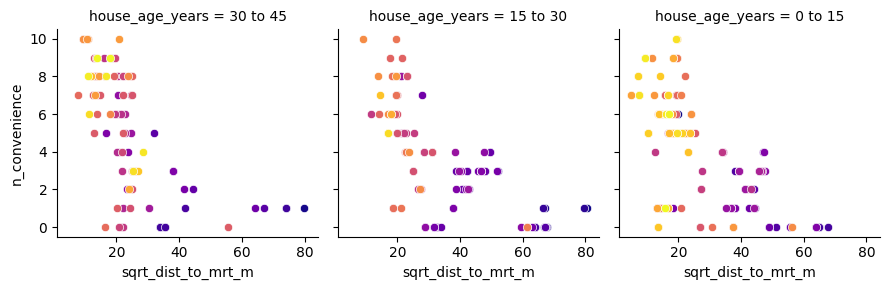

In [49]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col="house_age_years",
            hue="price_twd_msq",
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         "sqrt_dist_to_mrt_m",
         "n_convenience",
         )

# Show the plot (brighter colors mean higher prices)
plt.show()

NOTE: *The plot shows the same as before: house price increases with shorter distances to the nearest MRT station, and increases with the number of nearby convenience stores. Faceting by house age suggests that this effect is similar for all house age groups. As you add more variables, it becomes increasingly challenging to create an easily interpretable plot.*

**Different levels of interaction**:

Once we have three explanatory variables, the number of options for specifying interactions increases. We can specify no interactions. We can specify 2-way interactions, which gives we model coefficients for each pair of variables. The third option is to specify all the interactions, which means the three 2-way interactions and the interaction between all three explanatory variables.

As the number of explanatory variables increases further, the number of interaction possibilities rapidly increases.

In [50]:
# Model price vs. no. of conv. stores, sqrt dist. to MRT station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years", data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

Intercept                      15.474464
house_age_years[T.15 to 30]    -1.344405
house_age_years[T.30 to 45]    -1.708970
n_convenience                   0.257666
sqrt_dist_to_mrt_m             -0.148102
dtype: float64


In [51]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years + 0", data=taiwan_real_estate).fit()


# See the result
print(mdl_price_vs_all_3_way_inter.params)

house_age_years[0 to 15]                                        16.046849
house_age_years[15 to 30]                                       13.760066
house_age_years[30 to 45]                                       12.088773
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]    -0.003821
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.004401
dtype: float64


In [52]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols("price_twd_msq ~ (n_convenience + sqrt_dist_to_mrt_m + house_age_years) ** 2 + 0", data=taiwan_real_estate).fit()


# See the result
print(mdl_price_vs_all_2_way_inter.params)

house_age_years[0 to 15]                          16.026633
house_age_years[15 to 30]                         13.880791
house_age_years[30 to 45]                         11.926904
n_convenience                                      0.384914
n_convenience:house_age_years[T.15 to 30]         -0.006894
n_convenience:house_age_years[T.30 to 45]          0.143416
sqrt_dist_to_mrt_m                                -0.162025
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]     0.031600
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.068198
n_convenience:sqrt_dist_to_mrt_m                  -0.008956
dtype: float64


 NOTE: *The formula syntax is flexible enough to provide precise control over which interactions are specified.*

**Predicting again**:

We've followed the prediction workflow several times now with different combinations of explanatory variables. Time to try it once more on the model with three explanatory variables. Here, we'll use the model with 3-way interactions, though the code is the same when using any of the three models from the previously.

In [54]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate.house_age_years.unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])

# See the result
print(explanatory_data.head())

   n_convenience  sqrt_dist_to_mrt_m house_age_years
0              0                   0        30 to 45
1              0                   0        15 to 30
2              0                   0         0 to 15
3              0                  10        30 to 45
4              0                  10        15 to 30


In [55]:
# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data)
)

# See the result
print(prediction_data.head())

   n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0              0                   0        30 to 45      12.088773
1              0                   0        15 to 30      13.760066
2              0                   0         0 to 15      16.046849
3              0                  10        30 to 45      11.072148
4              0                  10        15 to 30      12.496811


NOTE: *Notice how rapidly the dimensions of the prediction data increase when you are adding more and more variables.*

#### How linear regression works:

Let's see how linear regression works. To keep things understandable, we'll stick to simple linear regression, with a single numeric explanatory variable.

Here's the same plot, showing the residuals. That is, the actual response minus the predicted response. For the best fit, we want those red lines to be as short as possible. That is, we want a metric that measures the size of all the residuals, and we want to make that as small as possible.
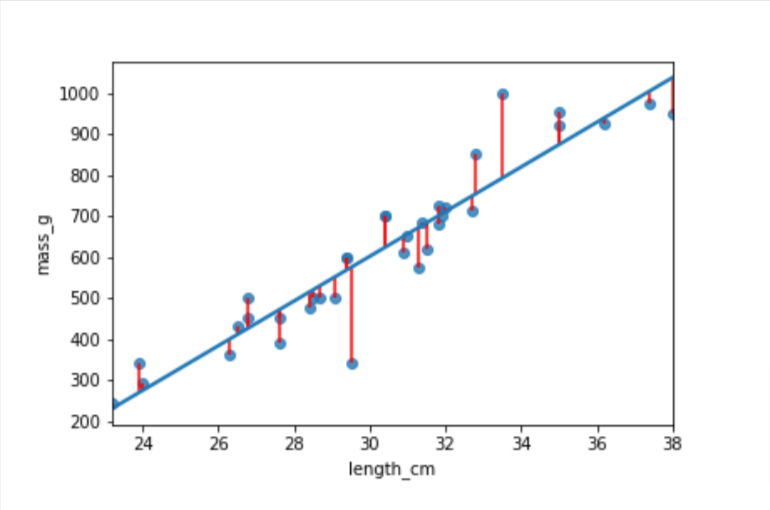

The simplest idea for that metric would be to add up all the residuals. This doesn't work because some residuals are negative, so they would make the total smaller instead of larger. Instead, we do the next easiest thing, which is to square each residual so that they are non-negative, and then add them up. This metric is called the sum of squares. The tricky part is determining which intercept and slope coefficients will result in the smallest sum of squares.

To solve this problem, we need to take a detour into numerical optimization, which means finding the minimum point of a function. Consider this quadratic equation. The y-value is x-squared minus x plus ten. The plot shows that the minimum point of the function occurs when x is a little above zero and y is a little below ten, but how can we find it exactly?

It's possible to solve this with calculus. Don't worry if this doesn't make sense, you won't need it for the exercises. You find the minimum by taking the derivative, setting that derivative to zero, rearranging for x, then substituting back into the original equation to find y. It gets the right answer. x is zero-point-five and y is nine-point-seven-five. However, not all equations can be solved in this analytic fashion, and ever since Newton and Liebniz invented calculus, mathematicians have been trying to find ways of avoiding it. In fact, one of the perks of being a data scientist is that you can just let Python figure out how to find the minimum.

To perform numerical optimization in Python, you can use the optimize package from scipy. In this case, you'll need the minimize function. The function you want to minimize is defined here. It takes x as an input, and returns y as x-squared minus x plus ten. Then you call minimize. The first argument is the function to call, without parentheses. The second argument is an initial guess at the answer. For more complicated functions, this is sometimes important, but here you could pick anything. In the output, you see fun, the estimated y-value of the function, which is spot on. The x-value is at the bottom. It's close to the correct answer of zero-point-five, and if you need better accuracy, there are many options you can play with to improve the answer. The other pieces of output are diagnostic values, which we don't need here.

While ols() is hundreds of lines of code, you can implement simple linear regression for a specific dataset in just a few lines. You define a function that accepts the intercept and slope, and returns the sum of the squares of residuals. You'll have to use the trick of giving the function a single coeffs argument, then extracting the individual intercept and slope. You'll perform the rest of the calculation yourself in the exercises. Then you call minimize, passing an initial guess for the coefficients and your sum of squares function.

**Linear regression algorithm:**

To truly understand linear regression, it is helpful to know how the algorithm works. The code for ols() is hundreds of lines because it has to work with any formula and any dataset. However, in the case of simple linear regression for a single dataset, you can implement a linear regression algorithm in just a few lines of code.

The workflow is:

First, write a function to calculate the sum of squares using this general syntax:

```
def function_name(args):
  # some calculations with the args
  return outcome
```

Second, use scipy's minimize function find the coefficients that minimize this function.
The explanatory values (the n_convenience column of taiwan_real_estate) are available as x_actual. The response values (the price_twd_msq column of taiwan_real_estate) are available as y_actual.

Complete the function body.

- Unpack coeffs to intercept and slope, respectively.
- Calculate the predicted y-values as the intercept plus the slope times
- the actual x-values.

Calculate the differences between actual and predicted y-values.
Calculate the sum of squares: square the differences in y-values and take the sum.
Return the sum of squares.

In [ ]:
# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_pred and y_actual
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq

# Test the function with intercept 10 and slope 1
print(calc_sum_of_squares([10, 1]))

In [ ]:
# Call minimize on calc_sum_of_squares
print(minimize(fun=calc_sum_of_squares,
               x0=[0, 0]))

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)

NOTE: *The results you got here with just a few lines of code are identical to the finely-tuned results from ols(). All you needed was a function to calculate the sum of squares metric, and the minimize() function worked its magic to find where this function had its minimum value.*

## Multiple logistic regression

We'll revisit the three-column bank churn dataset from the previously. has_churned is the response, denoting whether or not the customer churned, time_since_first_purchase is a measure of the length of relationship with the customer, and time_since_last_purchase is a measure of the recency of activity of the customer. The explanatory variables have been transformed to protect commercially sensitive information.

Recall that to perform a logistic regression in statsmodels, you use the logit function instead of ols. To extend logistic regression to multiple explanatory variables, you change the formula in the same way as linear regression, with a plus to ignore interactions, or a times to include interactions. There's no new syntax here.

Recall that when the response variable has two possible values, there are four outcomes for the model. Either it correctly predicts positive and negative responses, or it gets it wrong with a false positive or false negative. We can quantify and visualize these four outcomes using a confusion matrix. as we saw in the previous course. The confusion matrix lets you calculate metrics like model accuracy, sensitivity and specificity. You will do this in the exercises.

The prediction flow of multiple logistic regression should also feel familiar, since you've seen all the techniques already. Use itertools' product function to create combinations of explanatory variables, store them in a DataFrame, then assign a new column of predictions.

For visualization purposes, we will also create a column with most likely outcomes. It holds the rounded values of the churn predictions: if the probability of churning is less than 0-point-5, the most likely outcome is that they won't churn. If their probability is greater than 0-point-5, it's more likely that they will churn. Then, two scatter plots are drawn: one for the actual churn data, and one for the prediction data, colored by most likely outcome. You'll see what it looks like in the exercises.

In [4]:
churn = pd.read_csv("/content/churn.csv")
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


**Logistic regression with two explanatory variables**:

Logistic regression also supports multiple explanatory variables. To include multiple explanatory variables in logistic regression models, the syntax is the same as for linear regressions.

Here we'll fit a model of churn status with both of the explanatory variables from the dataset: the length of customer relationship and the recency of purchase, and their interaction.

In [7]:
# Import logit
from statsmodels.formula.api import logit
from itertools import product

# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit("has_churned ~ time_since_first_purchase * time_since_last_purchase", data=churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5
Intercept                                            -0.150534
time_since_first_purchase                            -0.637642
time_since_last_purchase                              0.423284
time_since_first_purchase:time_since_last_purchase    0.112250
dtype: float64


NOTE: *The formula syntax for including multiple explanatory variables is the same for logistic regression as it is for linear regression.*

**Logistic regression prediction**:

As with linear regression, the joy of logistic regression is that you can make predictions. Let's step through the prediction flow one more time!

In [9]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase", "time_since_last_purchase"])

# Print the result
print(explanatory_data.head())

   time_since_first_purchase  time_since_last_purchase
0                       -2.0                      -1.0
1                       -2.0                      -0.9
2                       -2.0                      -0.8
3                       -2.0                      -0.7
4                       -2.0                      -0.6


In [10]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_both_inter.predict(explanatory_data)
)

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# See the result
print(prediction_data.head())

   time_since_first_purchase  time_since_last_purchase  has_churned  \
0                       -2.0                      -1.0     0.716256   
1                       -2.0                      -0.9     0.720279   
2                       -2.0                      -0.8     0.724266   
3                       -2.0                      -0.7     0.728218   
4                       -2.0                      -0.6     0.732134   

   most_likely_outcome  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0  


NOTE: *The prediction workflow should be familiar now: you've seen it many times before. Let's now visualize both the actual and predicted churn data.*

**Visualizing multiple explanatory variables:**

Plotting has similar issues as with the linear regression case: it quickly becomes difficult to include more numeric variables in the plot. Here we'll look at the case of two numeric explanatory variables, and the solution is basically the same as before: use color to denote the response.

Here there are only two possible values of response (zero and one), both in the actual dataset and the predicted dataset.

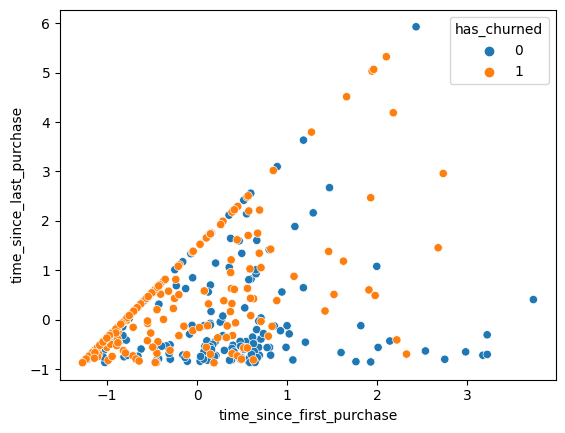

In [11]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase", y="time_since_last_purchase", hue="has_churned", data=churn)

# Show the plot
plt.show()

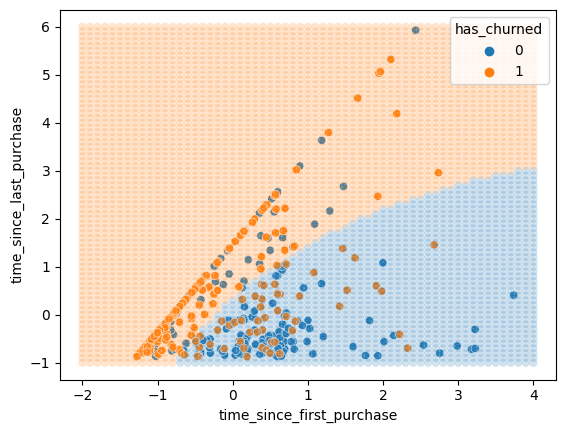

In [12]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn,
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=prediction_data,
                hue="most_likely_outcome",
     alpha=0.2,
     legend=False)

# Show the plot
plt.show()

NOTE: *The reason why the data points lie on or to the right of the diagonal line is due to nature of the data: the time since the last purchase can't exceed the time since the first purchase. Also notice the pattern of the prediction data: longer customer relationships and shorter purchase recency predicts lower churns.*

Confusion matrix:

When the response variable has just two outcomes, like the case of churn, the measures of success for the model are "how many cases where the customer churned did the model correctly predict?" and "how many cases where the customer didn't churn did the model correctly predict?". These can be found by generating a confusion matrix and calculating summary metrics on it.

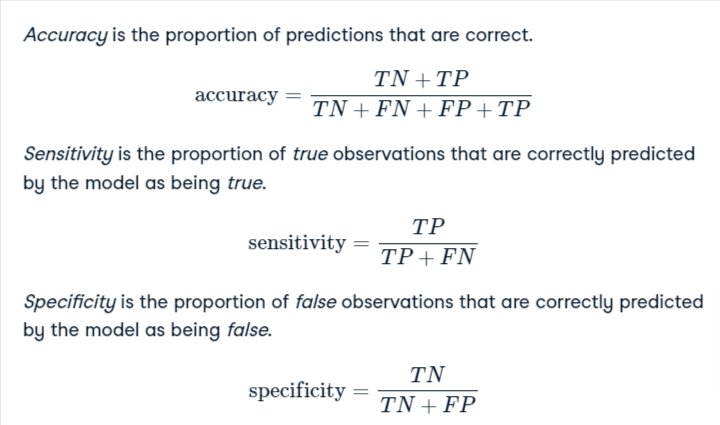

In [13]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Print it
print(conf_matrix)

[[102.  98.]
 [ 53. 147.]]


In [14]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

# Calculate and print the accuracy
accuracy = (TP + TN) / (TN + TP + FN + FP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)

accuracy 0.6225
sensitivity 0.735
specificity 0.51


NOTE: *Generating a confusion matrix and calculating metrics like accuracy, sensitivity, and specificity is the standard way to measure how well a logistic model fits. Higher accuracy, sensitivity, and specificity is better, though there is often a trade-off between sensitivity and specificity. Compared to the previous course where you calculated the metrics for the model with a single explanatory variable, accuracy and sensitivity increased, but specificity decreased.*

#### The logistic distribution

The CDF for the logistic distribution is also known as the logistic function. The two terms are interchangeable. It has a fairly simple equation: one divided by one plus e to the minus x. The inverse CDF is sometimes called the logit function; again, the terms are interchangeable. This may ring a bell: recall from the previously that logit is also known as the log odds ratio for describing predictions. Its equation is the logarithm of p divided by one minus p. In order to see what these curves look like, we'll plot them.

**Cumulative distribution function**:

Understanding the logistic distribution is key to understanding logistic regression. Like the normal (Gaussian) distribution, it is a probability distribution of a single continuous variable. Here we'll visualize the cumulative distribution function (CDF) for the logistic distribution. That is, if we have a logistically distributed variable, x, and a possible value, xval, that x could take, then the CDF gives the probability that x is less than xval.

The logistic distribution's CDF is calculated with the logistic function (hence the name). The plot of this has an S-shape, known as a sigmoid curve. An important property of this function is that it takes an input that can be any number from minus infinity to infinity, and returns a value between zero and one.

In [15]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)


In [16]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist["log_cdf_man"], logistic_dist["log_cdf_man"]))

True


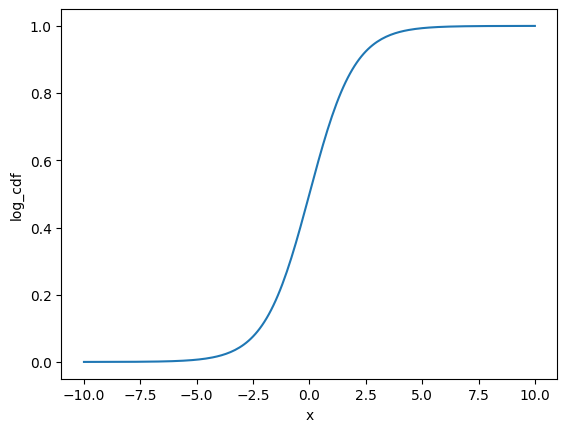

In [17]:
# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x="x",
             y="log_cdf",
             data=logistic_dist)

# Show the plot
plt.show()

NOTE: *The logistic distribution's cumulative distribution function has an "S" shape, known as a sigmoid curve.*

**Inverse cumulative distribution function**:

The logistic function (logistic distribution CDF) has another important property: each x input value is transformed to a unique value. That means that the transformation can be reversed. The logit function is the name for the inverse logistic function, which is also the logistic distribution inverse cumulative distribution function. (All three terms mean exactly the same thing.)

The logit function takes values between zero and one, and returns values between minus infinity and infinity.

In [18]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)


In [19]:
# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man":  np.log(p / (1 - p))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist_inv["logit"], logistic_dist_inv["logit_man"]))

True


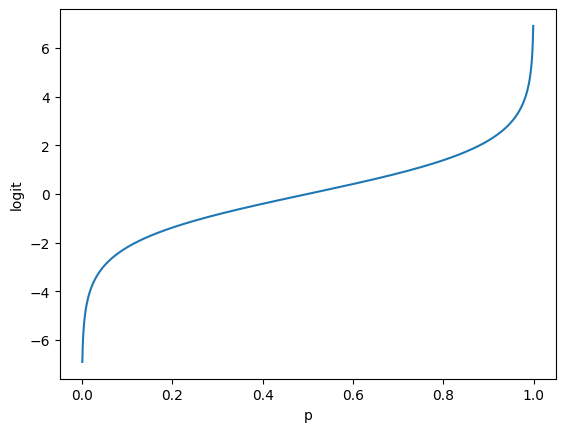

In [20]:
# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x="p",y="logit", data=logistic_dist_inv
                       )

# Show the plot
plt.show()

NOTE: *The inverse CDF is the "opposite" transformation to the CDF. If you flip the x and y axes on this plot, you get the same plot you saw in the previous exercise.*

**Logistic distribution parameters**:

The logistic CDF is not just a single curve. In the same way that the normal distribution has mean and standard deviation parameters that affect the CDF curve, the logistic distribution has location and scale parameters.

As location increases The Logistic CDF curve move rightward and as scale increases the steepness of the slope decreases.

The logistic distribution consists of a whole family of curves specified by the location and scale parameters. This allows logistic model prediction curves to have different positions or steepnesses.

#### How logistic regression works

The principle is the same as for linear regression: choose a metric that measures how far the predicted responses are from the actual responses, and optimize that metric.

In the linear regression case, the metric to optimize was the sum of squares. That is, you calculated each predicted response minus the corresponding actual response, squared it, then took the sum. In the case of logistic regression, the actual response is always either zero or one, and the predicted response is between these two values. It turns out that the sum of squares metric optimizes poorly under these restrictions, and that there is a better metric.

This is the likelihood metric. Unlike the sum of squares, where the goal was to find the minimum possible value, with likelihood you want to find the maximum value. You take the product of the predicted and actual responses, and add the product of one minus the predicted responses and one minus the actual responses.

Then you sum over all data points. Since the actual response only has two possible values, this equation simplifies in two different ways. When the actual response is one, the equation for each observation simplifies to the predicted response, y_pred. As y_pred increases, the metric increases too, and the maximum likelihood occurs when y_pred is one, the same as the actual value. When the actual response is zero, the equation simplifies to one minus the predicted response. As y_pred decreases, the metric increases, and the maximum likelihood occurs when y_pred is zero. In either case, you get a higher likelihood score when the predicted response is close to the actual response.

When calculating the likelihood, y_pred is often close to zero or one, which means you end up adding up lots of very small numbers, which introduces numerical error. It is more efficient to compute the log-likelihood. The only difference in this equation is that you take the logarithm of the predicted response terms. Optimizing to find the log-likelihood gives the same coefficients as optimizing to find the likelihood.

Since we want to maximize likelihood, but the optimize package can only minimize functions, one tweak to make is to calculate the negative log-likelihood. That is, include a minus sign when you calculate the sum of each observation's likelihood contribution.

**Logistic regression algorithm:**

Let's dig into the internals and implement a logistic regression algorithm. Since statsmodels's logit() function is very complex, you'll stick to implementing simple logistic regression for a single dataset.

Rather than using sum of squares as the metric, we want to use likelihood. However, log-likelihood is more computationally stable, so we'll use that instead. Actually, there is one more change: since we want to maximize log-likelihood, but minimize() defaults to finding minimum values, it is easier to calculate the negative log-likelihood.

The log-likelihood value for each observation is

The metric to calculate is the negative sum of these log-likelihood contributions.



In [ ]:
# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1- y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll

# Test the function with intercept 10 and slope 1
print(calc_neg_log_likelihood([10, 1]))

In [ ]:
# Call minimize on calc_sum_of_squares
print(minimize(fun=calc_neg_log_likelihood,
               x0=[0, 0]))

# Compare the output with the logit() call.
print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

NOTE: *To make a really simple version of logit(), you just needed a function to calculate the negative log-likelihood, and a general-purpose optimization function.*

#### Conclusion:

- First we fitted, visualized, predicted and assessed parallel slopes linear regression models.
- Then we explored interactions between explanatory variables, and tried to resolve Simpson's Paradox.
- we also saw that although visualization gets tricky with more explanatory variables, modeling easily handles them.
- Then we ran logistic regression with multiple explanatory variables, and explored the logistic distribution. On top of that, we implemented algorithms for linear regression and logistic regression.